<a href="https://colab.research.google.com/github/luckylula/generador-preguntas-ciencias/blob/main/Algoritmos_AG3_MARTINEZ_PEREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de librerias

In [1]:
!pip install requests    #Hacer llamadas http a paginas de la red
!pip install tsplib95    #Modulo para las instancias del problema del TSP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127

#Carga de los datos del problema

In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [8]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [ ]:
Aristas


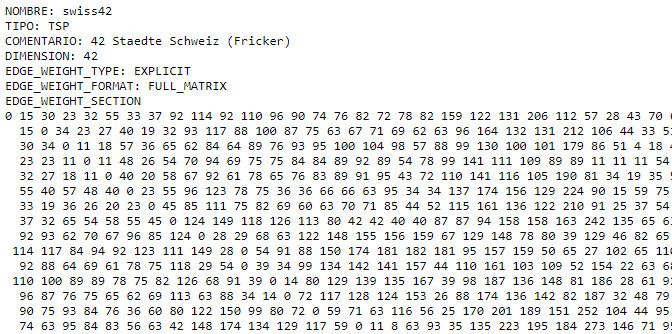

In [9]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(0, 1)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

15

#Funcionas basicas


In [17]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)

distancia_total(sol_temporal, problem), sol_temporal

(4326,
 [0,
  28,
  38,
  24,
  21,
  17,
  5,
  14,
  32,
  2,
  3,
  13,
  31,
  39,
  23,
  40,
  9,
  1,
  25,
  30,
  7,
  27,
  34,
  11,
  41,
  33,
  19,
  20,
  18,
  36,
  6,
  12,
  29,
  8,
  22,
  10,
  26,
  15,
  35,
  16,
  4,
  37])

###  Modificación 1: Visualización paso a paso de la construcción de la solución aleatoria

En esta modificación, he ajustado la función `crear_solucion` para que muestre, paso a paso, cómo se va construyendo la solución aleatoria del problema TSP.

####  ¿Qué hace exactamente esta mejora?

- En lugar de simplemente devolver una lista de nodos en orden aleatorio, ahora la función imprime cada uno de los nodos que se van añadiendo a la solución.
- Se indica el número del paso y el nodo que ha sido seleccionado en ese momento.
- Permite visualizar cómo se construye internamente la ruta final.

#### ¿Por qué he hecho esta modificación?

- Para entender mejor el proceso de construcción de la solución, especialmente cuando estamos aprendiendo cómo funcionan los algoritmos aleatorios.
- Es una forma sencilla de verificar que no se repiten nodos, que se comienza por el nodo correcto y que se sigue una lógica de selección válida.
- También permite detectar errores fácilmente, si los hubiera, y sirve como apoyo pedagógico.

#### Resultado

Al ejecutar la función, se obtiene una traza detallada en consola del recorrido paso a paso, lo que mejora considerablemente la comprensión del código sin alterar su funcionamiento interno. Además, se mantiene la funcionalidad original de calcular la distancia total de la ruta generada.



In [20]:
import random

# Función modificada: mostrar paso a paso la construcción de la solución
def crear_solucion_paso_a_paso(Nodos):
    solucion = [Nodos[0]]
    print(f"Inicio en el nodo: {Nodos[0]}")

    for i, n in enumerate(Nodos[1:], start=1):
        candidatos = list(set(Nodos) - set({Nodos[0]}) - set(solucion))
        elegido = random.choice(candidatos)
        solucion.append(elegido)
        print(f"Paso {i}: añado nodo {elegido}")

    return solucion

# Distancia entre dos nodos
def distancia(a, b, problem):
    return problem.get_weight(a, b)

# Distancia total de la ruta
def distancia_total(solucion, problem):
    distancia_total = 0
    for i in range(len(solucion)-1):
        distancia_total += distancia(solucion[i], solucion[i+1], problem)
    return distancia_total + distancia(solucion[-1], solucion[0], problem)

# Usar funciones
sol_temporal = crear_solucion_paso_a_paso(Nodos)
print("\nDistancia total:", distancia_total(sol_temporal, problem))


Inicio en el nodo: 0
Paso 1: añado nodo 22
Paso 2: añado nodo 16
Paso 3: añado nodo 40
Paso 4: añado nodo 9
Paso 5: añado nodo 24
Paso 6: añado nodo 17
Paso 7: añado nodo 29
Paso 8: añado nodo 28
Paso 9: añado nodo 27
Paso 10: añado nodo 5
Paso 11: añado nodo 3
Paso 12: añado nodo 20
Paso 13: añado nodo 23
Paso 14: añado nodo 31
Paso 15: añado nodo 34
Paso 16: añado nodo 33
Paso 17: añado nodo 30
Paso 18: añado nodo 38
Paso 19: añado nodo 8
Paso 20: añado nodo 12
Paso 21: añado nodo 11
Paso 22: añado nodo 10
Paso 23: añado nodo 41
Paso 24: añado nodo 6
Paso 25: añado nodo 19
Paso 26: añado nodo 14
Paso 27: añado nodo 1
Paso 28: añado nodo 36
Paso 29: añado nodo 37
Paso 30: añado nodo 26
Paso 31: añado nodo 18
Paso 32: añado nodo 13
Paso 33: añado nodo 21
Paso 34: añado nodo 32
Paso 35: añado nodo 2
Paso 36: añado nodo 15
Paso 37: añado nodo 4
Paso 38: añado nodo 39
Paso 39: añado nodo 25
Paso 40: añado nodo 7
Paso 41: añado nodo 35

Distancia total: 4150


#BUSQUEDA ALEATORIA

In [21]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 10000)

Mejor solución: [27, 4, 16, 38, 39, 2, 37, 32, 17, 30, 23, 12, 25, 18, 6, 20, 33, 1, 36, 15, 19, 7, 26, 28, 0, 5, 14, 22, 3, 24, 40, 21, 8, 10, 11, 13, 31, 41, 9, 29, 35, 34]
Distancia     : 3679


### Modificación: Registro y visualización de la evolución de la mejor distancia en la búsqueda aleatoria

En esta segunda modificación he ampliado la función `busqueda_aleatoria` para que no solo devuelva la mejor solución encontrada, sino que además registre la evolución de la mejor distancia a lo largo de las iteraciones y la muestre en un gráfico.

#### ¿Qué hace esta mejora?

- En cada iteración, guarda el valor actual de la mejor distancia alcanzada hasta ese momento.
- Al finalizar las N iteraciones, se genera un gráfico donde se puede ver cómo va mejorando la calidad de las soluciones conforme avanza la búsqueda.
- Este tipo de visualización permite analizar el comportamiento del algoritmo: si mejora rápido al principio, si se estanca, o si sigue encontrando mejoras poco a poco.

#### ¿Por qué he hecho esta modificación?

- Para entender mejor cómo evoluciona el algoritmo de búsqueda aleatoria.
- Porque me permite ver si 10000 iteraciones es mucho o poco, y si vale la pena aumentarlas.
- Es una forma visual de acompañar los resultados y puede ser muy útil para comparar con otros algoritmos más avanzados más adelante.

####  Resultado

El gráfico generado ayuda a reflexionar sobre la eficiencia de la búsqueda aleatoria y proporciona una referencia visual clara para el análisis del comportamiento del algoritmo. Esta mejora, aunque sencilla, aporta mucha claridad al proceso.



Mejor solución: [29, 11, 8, 41, 23, 9, 0, 30, 27, 3, 10, 32, 24, 40, 18, 35, 31, 6, 4, 1, 39, 25, 13, 15, 34, 28, 2, 33, 12, 5, 26, 16, 14, 21, 22, 38, 37, 7, 17, 19, 36, 20]
Distancia     : 3648


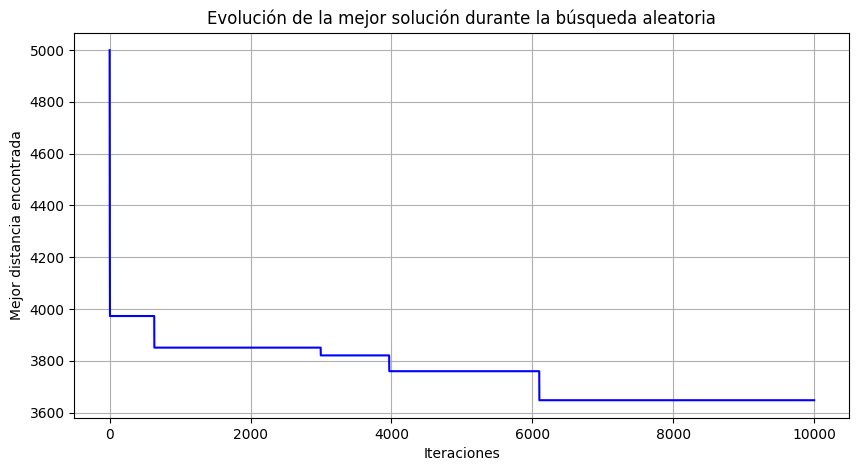

In [22]:
import matplotlib.pyplot as plt

def busqueda_aleatoria_con_grafico(problem, N):
    Nodos = list(problem.get_nodes())

    mejor_solucion = []
    mejor_distancia = float('inf')
    historial_mejor_distancia = []

    for i in range(N):
        solucion = crear_solucion(Nodos)
        distancia = distancia_total(solucion, problem)

        if distancia < mejor_distancia:
            mejor_solucion = solucion
            mejor_distancia = distancia

        historial_mejor_distancia.append(mejor_distancia)

    print("Mejor solución:" , mejor_solucion)
    print("Distancia     :" , mejor_distancia)

    # Gráfico de evolución
    plt.figure(figsize=(10, 5))
    plt.plot(historial_mejor_distancia, color='blue')
    plt.xlabel("Iteraciones")
    plt.ylabel("Mejor distancia encontrada")
    plt.title("Evolución de la mejor solución durante la búsqueda aleatoria")
    plt.grid(True)
    plt.show()

    return mejor_solucion

# Ejecutar con 10000 iteraciones
solucion = busqueda_aleatoria_con_grafico(problem, 10000)


#BUSQUEDA LOCAL

In [23]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3648
Distancia Mejor Solucion Local: 3384


### Modificación: Visualización de la solución antes y después de aplicar búsqueda local

En esta modificación he añadido la visualización de la ruta antes y después de aplicar el operador de búsqueda local basado en 2-opt. El objetivo es observar de forma visual qué cambios se producen en la solución inicial al aplicar una mejora local.

Qué hace esta mejora:

- Dibuja la ruta inicial generada aleatoriamente
- Aplica el operador 2-opt para encontrar una solución vecina mejor
- Vuelve a dibujar la nueva ruta mejorada, lo que permite comparar con la original

Por qué he hecho esta modificación:

- Porque facilita la comprensión de cómo funciona realmente la búsqueda local
- Porque es una forma visual de comprobar que el algoritmo está mejorando la solución
- Porque ayuda a detectar si el operador 2-opt realmente modifica la ruta o no

Resultado:

Con esta mejora, se puede visualizar claramente el efecto del algoritmo local sobre una solución concreta. No solo se observa la diferencia de distancia, sino también el cambio estructural en el recorrido, lo cual enriquece el análisis del funcionamiento del algoritmo.


Distancia Solución Inicial: 3648


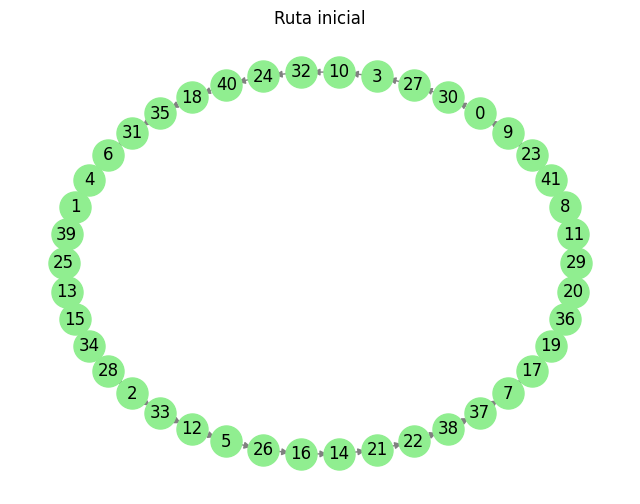

Distancia Mejor Solución Local: 3384


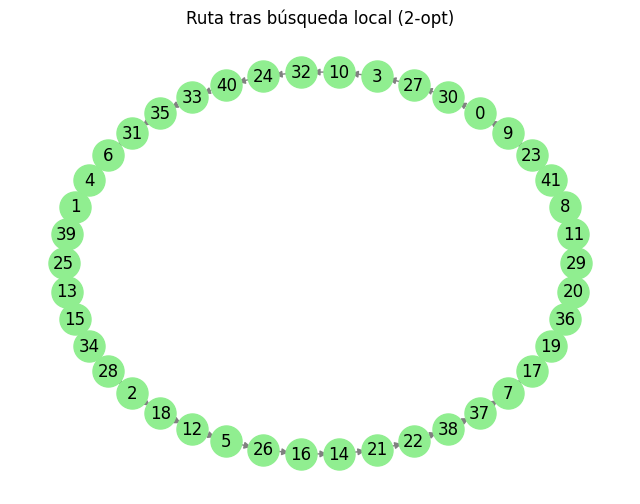

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualiza una ruta abstracta con nodos conectados según el orden de visita
def visualizar_ruta(ruta, titulo="Ruta"):
    G = nx.DiGraph()
    G.add_nodes_from(ruta)
    edges = [(ruta[i], ruta[i+1]) for i in range(len(ruta) - 1)]
    edges.append((ruta[-1], ruta[0]))  # cerrar ciclo
    G.add_edges_from(edges)

    pos = nx.circular_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=500)
    nx.draw_networkx_labels(G, pos, font_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray', arrows=True)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Visualizar solución original
print("Distancia Solución Inicial:", distancia_total(solucion, problem))
visualizar_ruta(solucion, titulo="Ruta inicial")

# Buscar vecina y visualizarla
nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solución Local:", distancia_total(nueva_solucion, problem))
visualizar_ruta(nueva_solucion, titulo="Ruta tras búsqueda local (2-opt)")


In [ ]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(problem )

En la iteracion  35 , la mejor solución encontrada es: [0, 39, 24, 40, 21, 9, 14, 16, 19, 10, 8, 4, 6, 5, 13, 26, 28, 29, 30, 32, 31, 35, 36, 1, 3, 27, 2, 18, 12, 11, 25, 41, 23, 22, 38, 34, 33, 20, 17, 37, 15, 7]
Distancia     : 2040


### Modificación: Registro y visualización de la evolución de la distancia en búsqueda local

En esta modificación he añadido una funcionalidad para registrar y graficar cómo evoluciona la distancia total durante el proceso de búsqueda local iterativa. Esto permite observar si realmente el algoritmo está mejorando la solución en cada iteración y en qué momento se detiene al alcanzar un mínimo local.

Qué hace esta mejora:

- Guarda la distancia de la mejor solución encontrada en cada iteración
- Al terminar, genera un gráfico que muestra la evolución de esa distancia a lo largo del tiempo
- Permite ver de forma visual cuántas mejoras se han producido y cuándo se estanca la búsqueda

Por qué he hecho esta modificación:

- Porque es una forma clara de comprobar que el algoritmo está funcionando correctamente
- Porque ayuda a entender visualmente el concepto de mínimo local en algoritmos de optimización
- Porque puede ser útil para decidir si queremos probar otras estrategias que eviten quedarse atascados

Resultado:

El gráfico final muestra la trayectoria de mejora del algoritmo, lo que facilita tanto su análisis como la explicación de su funcionamiento. Es una modificación sencilla pero muy útil desde el punto de vista educativo y analítico.


Iteración final: 31
Mejor distancia encontrada: 1883


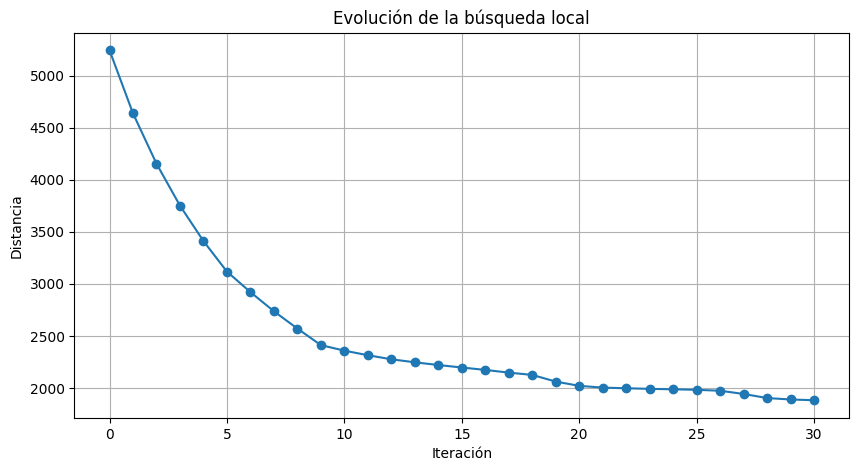

In [25]:
import matplotlib.pyplot as plt

def busqueda_local_con_grafico(problem):
    mejor_solucion = []
    solucion_referencia = crear_solucion(Nodos)
    mejor_distancia = distancia_total(solucion_referencia, problem)

    historial = [mejor_distancia]
    iteracion = 0

    while True:
        iteracion += 1
        vecina = genera_vecina(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina
            solucion_referencia = vecina
            historial.append(mejor_distancia)
        else:
            print("Iteración final:", iteracion)
            print("Mejor distancia encontrada:", mejor_distancia)

            # Mostrar gráfico de evolución
            plt.figure(figsize=(10, 5))
            plt.plot(historial, marker='o')
            plt.title("Evolución de la búsqueda local")
            plt.xlabel("Iteración")
            plt.ylabel("Distancia")
            plt.grid(True)
            plt.show()

            return mejor_solucion

# Ejecutar búsqueda local con gráfico
sol = busqueda_local_con_grafico(problem)

#SIMULATED ANNEALING


In [26]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [28]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [3, 7, 14, 15, 16, 12, 11, 27, 34, 20, 32, 0, 1, 17, 36, 35, 29, 8, 41, 25, 10, 2, 4, 6, 5, 26, 18, 13, 19, 37, 31, 33, 38, 22, 23, 9, 21, 40, 24, 39, 30, 28]
con una distancia total de 2082


### Modificación: Visualización de la evolución de la mejor distancia durante el recocido simulado

En esta modificación he añadido un gráfico que muestra cómo evoluciona la mejor distancia encontrada durante el proceso de recocido simulado. Este tipo de representación ayuda a entender cómo actúa el algoritmo a medida que se enfría la temperatura y disminuye la probabilidad de aceptar soluciones peores.

Qué hace esta mejora:

- Registra la mejor distancia encontrada en cada iteración del proceso
- Muestra un gráfico al finalizar que permite ver si se ha ido mejorando realmente
- Refuerza la idea de que el algoritmo puede aceptar malas soluciones al principio y luego se vuelve más selectivo

Por qué he hecho esta modificación:

- Porque ayuda a visualizar cómo funciona el recocido simulado en la práctica
- Porque permite analizar si el algoritmo se estanca o si sigue mejorando hasta el final
- Porque facilita comparar el comportamiento de este algoritmo con otros, como la búsqueda aleatoria o la búsqueda local

Resultado:

El gráfico generado muestra cómo la solución mejora con el tiempo y da una idea clara del comportamiento del algoritmo frente al descenso de temperatura. Es una forma intuitiva de analizar su eficiencia y su evolución.


Mejor solución encontrada:
[15, 35, 36, 37, 3, 28, 23, 40, 24, 21, 39, 41, 10, 4, 1, 7, 31, 17, 0, 27, 2, 5, 13, 26, 18, 12, 11, 25, 22, 38, 30, 32, 20, 33, 34, 29, 9, 8, 6, 14, 19, 16]
Distancia: 2064


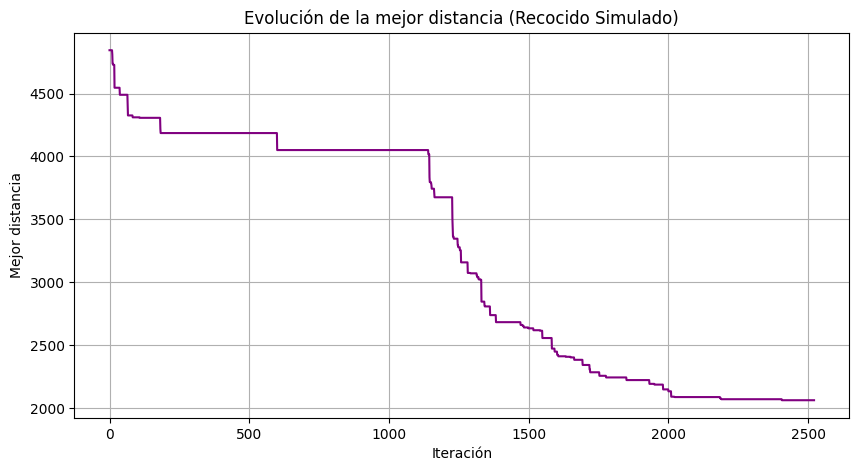

In [29]:
import math
import random
import matplotlib.pyplot as plt

def recocido_simulado_con_grafico(problem, TEMPERATURA):
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia[:]
    mejor_distancia = distancia_referencia

    historial = [mejor_distancia]
    iteracion = 0

    while TEMPERATURA > 0.0001:
        iteracion += 1
        vecina = genera_vecina_aleatorio(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina

        if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina)):
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        historial.append(mejor_distancia)
        TEMPERATURA = bajar_temperatura(TEMPERATURA)

    print("Mejor solución encontrada:")
    print(mejor_solucion)
    print("Distancia:", mejor_distancia)

    # Mostrar gráfica
    plt.figure(figsize=(10, 5))
    plt.plot(historial, color='purple')
    plt.title("Evolución de la mejor distancia (Recocido Simulado)")
    plt.xlabel("Iteración")
    plt.ylabel("Mejor distancia")
    plt.grid(True)
    plt.show()

    return mejor_solucion

# Ejecutar
sol = recocido_simulado_con_grafico(problem, 10000000)